refrence video ==> https://www.youtube.com/watch?v=JZBQLXgSGfs&t=288s

In [5]:
import math
%run graphstructures.ipynb
%run heap.ipynb

we have adjacency list and representing node via node class





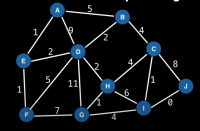

In [6]:
number_of_nodes = 10
num_of_edges = 18
adjacy_list = {
    "A" : [node(1,"E","A"),node(4,"D","A"),node(5,"B","A")],
    "B" : [node(5,"A","B"),node(4,"C","B"),node(2,"D","B")],
    "C" : [node(4,"B","C"),node(2,"J","C"),node(1,"I","C"),node(4,"H","C")],
    "D" : [node(2,"B","D"),node(4,"A","D"),node(2,"E","D"),node(5,"F","D"),node(11,"G","D"),node(2,"H","D")],
    "E" : [node(1,"A","E"),node(1,"F","E"),node(2,"D","E")],
    "F" : [node(7,"G","F"),node(1,"E","F"),node(5,"D","F")],
    "G" : [node(11,"D","G"),node(1,"H","G"),node(4,"I","G"),node(7,"F","G")],
    "H" : [node(2,"D","H"),node(1,"G","H"),node(6,"I","H"),node(4,"C","H")],
    "I" : [node(4,"G","I"),node(6,"H","I"),node(1,"C","I"),node(0,"J","I")],
    "J" : [node(0,"I","J"),node(2,"C","J")]
}

create visited dict to track visited nodes in search_and_create_min_heap() method

In [7]:
def create_visited():
    visited = {}
    for node in adjacy_list:
        visited[node] = False
    return visited

global variables:
degree: to create min indexed dheap|,,
reconstructed_path: to show our new mst|,,

In [8]:
degree = degree = math.ceil(num_of_edges / number_of_nodes) 
heap = MinIndexedDHeap(degree)
reconstructed_path = []

here we search all of the nodes neghbourings and adding them to heap

In [9]:
def search_and_create_min_heap():
    time = 0
    visited = create_visited()
    for node in adjacy_list:
        visited[node] = True
        search_neighbourings(node,visited)
    reconstruct_path()  

searches all neghbourings of each node

In [10]:
def search_neighbourings(node,visited):
    for item in adjacy_list[node]:
        if(visited[item.to] == True):continue
        heap.insert(item)

checks if the edge we want to add to the mst dosent create any cycle, by getting the end side of the edge and track it down to see if we reach
to starting side of the edge. ==> eg. we have c => j we take j and see which nodes are conected to j. eg. i => j then we check
to see what node is connected to i and we continue doing this until we discover a cycle if we dindt have any cycle return false or none

In [11]:
def does_create_cycle(item,target_node):
    for i in reconstructed_path:
        if(item == i.to):
           if(i.origin == target_node):
               return True 
           return does_create_cycle(i.origin,target_node)

every time gets the smallest edge cost and adds it to reconstructed_path if we dont have any cycle

In [12]:
def reconstruct_path():
    counter = 0
    while(counter != number_of_nodes - 1):
       item = heap.remove()
       if(does_create_cycle(item.to,item.origin)):continue
       reconstructed_path.append(item)
       counter += 1

shows contents of the reconstructed_path

In [13]:
def show():
    for i in reconstructed_path:
        print(f"{i.origin} to {i.to} = {i.weight}")

In [14]:
search_and_create_min_heap()
show()

I to J = 0
C to I = 1
G to H = 1
E to F = 1
A to E = 1
D to H = 2
B to D = 2
D to E = 2
G to I = 4


as you can see results could be different but same in weight cost ==> 





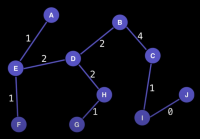





here instead of b to c = 4 we have g to i = 4